<a href="https://colab.research.google.com/github/Rajolep/Geometry/blob/master/SpeechComm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive/Datasets


In [2]:

%pip install kapre==0.1.7
%pip install soundfile


  Created wheel for kapre: filename=kapre-0.1.7-cp36-none-any.whl size=11666 sha256=b987e27bf1fb9535aaf62223f47663fe1074779d780a2b1b2b737ef8ac88c67f
  Stored in directory: /root/.cache/pip/wheels/80/b0/36/f8ef462364784fcb1b7782e73ec59821162318ec28556516b6
Successfully built kapre
  Found existing installation: kapre 0.1.3.1
    Uninstalling kapre-0.1.3.1:
      Successfully uninstalled kapre-0.1.3.1


In [4]:
!ls


drive  sample_data


In [5]:
! git clone https://github.com/gadepall/aiml.git

Cloning into 'aiml'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 3116 (delta 6), reused 36 (delta 2), pack-reused 3069
Receiving objects: 100% (3116/3116), 125.59 MiB | 33.60 MiB/s, done.
Resolving deltas: 100% (799/799), done.
Checking out files: 100% (2147/2147), done.


In [7]:
%cd /content/aiml/Speech-Command-Model/Data/Pradeep_16

/content/aiml/Speech-Command-Model/Data/Pradeep_16


In [8]:
%pip install kapre==0.1.7 
%pip install soundfile

In [10]:

import os
dir = '/content/aiml/Speech-Command-Model/Data/Pradeep_16/'
os.chdir(dir)

In [12]:

import soundfile as sf
import numpy as np

In [13]:
x_temp = []
y_temp= []
for a,i in enumerate(['forward','back','left','right','stop']): 
   #a will be an integer from 0 to 4 and i will be directory name

    list_file = os.listdir(dir+i)  
    #listdir() returns a list containing the names of the entries in the directory given by path
    
    for j in list_file:
        d,sr = sf.read(dir+i+'/'+j) ##returns data, samplerate from the sound file
        x_temp.append(d)
        y_temp.append(a)
  
    print(i,"directory processed")


#converting to numpy for faster access
x_temp = np.array(x_temp)
y_temp = np.array(y_temp)

############################
np.save('x.npy',x_temp)
np.save('y.npy',y_temp)

forward directory processed
back directory processed
left directory processed
right directory processed
stop directory processed


In [14]:

x_temp,y_temp

(array([[ 1.06811523e-03,  1.19018555e-03,  6.10351562e-04, ...,
          9.76562500e-04,  1.12915039e-03,  3.96728516e-04],
        [ 2.50244141e-03,  3.05175781e-03,  3.20434570e-03, ...,
         -5.18798828e-04, -4.57763672e-04, -6.40869141e-04],
        [ 1.37329102e-03,  1.31225586e-03,  3.05175781e-04, ...,
         -3.87573242e-03, -4.27246094e-03, -2.38037109e-03],
        ...,
        [ 1.03759766e-03,  1.31225586e-03,  1.22070312e-03, ...,
          1.19018555e-03,  1.58691406e-03,  1.06811523e-03],
        [ 1.92260742e-03,  1.61743164e-03,  6.10351562e-04, ...,
          9.15527344e-04,  4.27246094e-04,  6.10351562e-04],
        [ 2.13623047e-04, -3.05175781e-05, -4.27246094e-04, ...,
          7.32421875e-04, -6.10351562e-04, -1.03759766e-03]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       

In [15]:

len(x_temp),len(x_temp[0]),len(x_temp[1])

(400, 16000, 16000)

In [16]:
x_temp[0][0]

0.001068115234375

In [17]:
from sklearn.model_selection import train_test_split
x_trr,x_te,y_trr,y_te = train_test_split(x_temp,y_temp,stratify=y_temp,random_state=14,test_size=0.2)

In [19]:
x_trr.shape, x_te.shape, y_trr.shape,y_te.shape

((320, 16000), (80, 16000), (320,), (80,))

In [21]:
x_train = []
y_train = []
for i,j in enumerate(x_trr):
    # i will be an integer and j will contain the data
    #len(j) will be 16000 everytime as when data was created 16khz was decided as sampling rate
    a= len(j)       #a is 16000
    p = 25000-a     #this will give 25000-16000=9000

    for b in range(1 ,p, 500):    #this loop will run 9000/500= 18 times
        nx = np.zeros(25000)
        nx[b:b+a] =j                #16000 entries will be same as j, which was our original training pt
                                    #rest 9000 entries will be 0
        x_train.append(nx)
        y_train.append(y_trr[i])
#so for every iteration of x_trr, 18 samples are added
# that means total shape of x_train will be 18* len(x_trr)

#############################################
x_train = np.array(x_train)
y_train = np.array(y_train)
#############################################
x_test = []
y_test = []
for i,j in enumerate(x_te):
    x= len(j)
    p = 25000-x
    for y in range(1 ,p, 500):
        nx = np.zeros(25000)
        nx[y:y+x] =j
        x_test.append(nx)
        y_test.append(y_te[i])
#############################################
x_test = np.array(x_test)
y_test = np.array(y_test)
#############################################
np.save('x_train.npy',x_train)
np.save('y_train.npy',y_train)
np.save('x_test.npy',x_test)
np.save('y_test.npy',y_test)

In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5760, 25000), (5760,), (1440, 25000), (1440,))

In [23]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model

In [25]:
import kapre #Keras layers for audio pre-processing in deep learning
from kapre.utils import Normalization2D
from kapre.time_frequency import Melspectrogram

In [26]:
mfcc = Sequential()
mfcc.add(layers.Reshape((1, -1)))
mfcc.add(Melspectrogram(padding='same', sr=16000, n_mels=39, n_dft = 1024,
                        power_melgram=2.0, return_decibel_melgram=True,
                        trainable_fb=False, trainable_kernel=False,
                        name='mel_stft'))
mfcc.add(Normalization2D(str_axis='freq'))
mfcc.add(layers.Permute((2, 1, 3)))

x_train = mfcc.predict(x_train)
x_train.shape

x_test = mfcc.predict(x_test)
x_test.shape

np.save('mfcc_train.npy',x_train)
np.save('mfcc_test.npy',x_test)

In [27]:

# Change the directory 
data_dir = '/content/aiml/Speech-Command-Model/Data/Pradeep_16/'
x_train = np.load(data_dir+'mfcc_train.npy')
y_train = np.load(data_dir+'y_train.npy')
x_test = np.load(data_dir+'mfcc_test.npy')
y_test = np.load(data_dir+'y_test.npy')


In [28]:

tf.random.set_seed(14)
np.random.seed(14)

In [31]:
def AttentionModel(sr=16000, iLen=25000):
    
    inputs = layers.Input(x_train.shape[1:], name='Input')

    x = layers.Conv2D(10, (5, 1), activation='relu', padding='same', name='Conv1')(inputs)
    x = layers.BatchNormalization(name='BN1')(x)
    x = layers.Conv2D(1, (5, 1), activation='relu', padding='same', name='Conv2')(x)
    x = layers.BatchNormalization(name='BN2')(x)

    x = layers.Reshape(x.shape[1:-1],name='Squeeze')(x)

    n_units = 64
    x = layers.LSTM(n_units, return_sequences=True, name='LSTM_Sequences')(x)  

    # Calculate Unit Importance
    xLast = layers.Lambda(lambda q: q[:, -1], name='FinalSequence')(x)  # [b_s, vec_dim]
    xLast = layers.Dense(xLast.shape[-1], name='UnitImportance')(xLast)

    # Calculate attention
    attScores = layers.Dot(axes=[1, 2],name='AttentionScores')([xLast, x])
    attScores = layers.Softmax(name='AttentionSoftmax')(attScores)  

    x = layers.Dot(axes=[1, 1], name='AttentionVector')([attScores, x])  
    x = layers.Dense(32, activation='relu', name='FC')(x)
    outputs = layers.Dense(5, activation='softmax', name='Output')(x)
    model = Model(inputs=[inputs], outputs=[outputs], name='Attention')
    
    return model


In [32]:
model = AttentionModel()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=['sparse_categorical_crossentropy'], 
              metrics=['sparse_categorical_accuracy'])

In [33]:

model.summary()

Model: "Attention"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 49, 39, 1)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 49, 39, 10)   60          Input[0][0]                      
__________________________________________________________________________________________________
BN1 (BatchNormalization)        (None, 49, 39, 10)   40          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 49, 39, 1)    51          BN1[0][0]                        
__________________________________________________________________________________________

In [34]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,epochs=5,shuffle=True,batch_size=15)

Epoch 1/5
384/384 [==============================] - 4s 7ms/step - loss: 0.4592 - sparse_categorical_accuracy: 0.8507 - val_loss: 0.0028 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/5
384/384 [==============================] - 2s 6ms/step - loss: 8.8128e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0037 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/5
384/384 [==============================] - 2s 6ms/step - loss: 7.3759e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.8707e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/5
384/384 [==============================] - 2s 6ms/step - loss: 1.4533e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5446e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/5
384/384 [==============================] - 2s 6ms/step - loss: 8.5175e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1200e-04 - val_sparse_categorical_accuracy: 1.0000


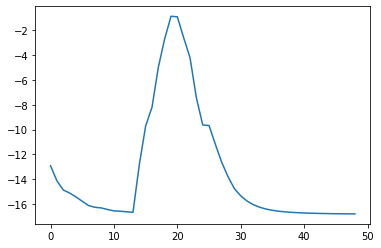

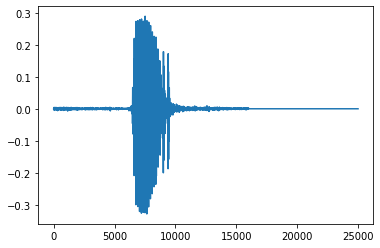

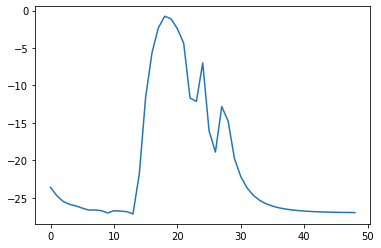

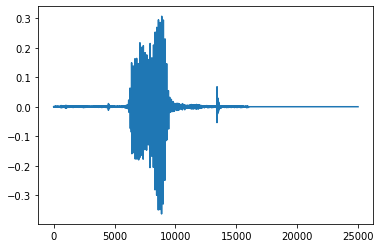

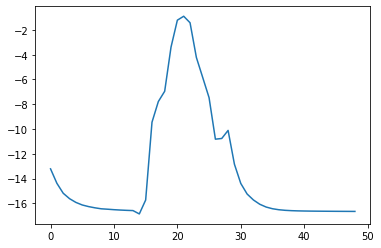

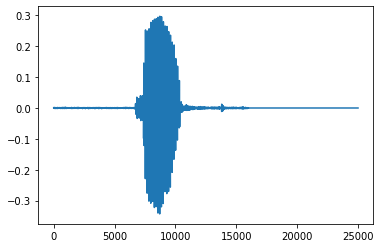

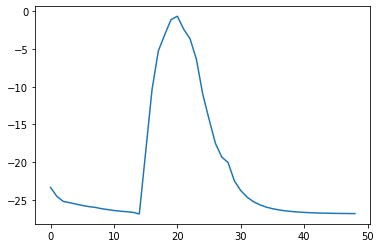

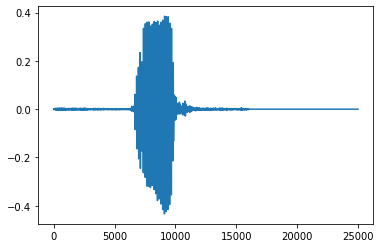

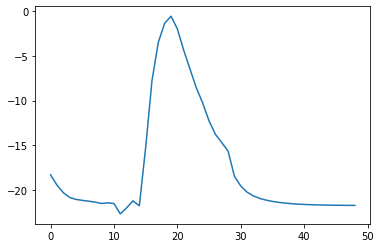

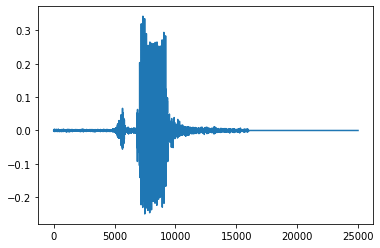

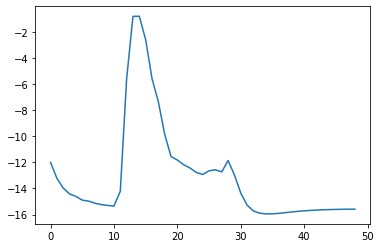

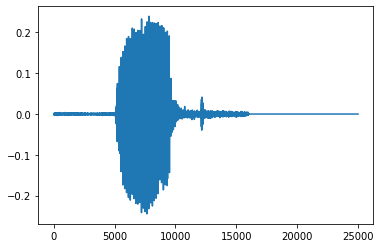

In [35]:
from matplotlib import pyplot as plt
model2 = Model(inputs=model.input, outputs=[model.get_layer('Output').output, 
                                            model.get_layer('AttentionSoftmax').output])
data_dir = '/content/aiml/Speech-Command-Model/Data/Pradeep_16/'

a,b = model2.predict(x_test)
xx_test = np.load(data_dir+'x_test.npy')
for aid in range(0,100,18):
    plt.plot(range(len(b[aid])), np.log(b[aid]))
    plt.show()
    plt.plot(range(len(xx_test[aid])),xx_test[aid])
    plt.show()